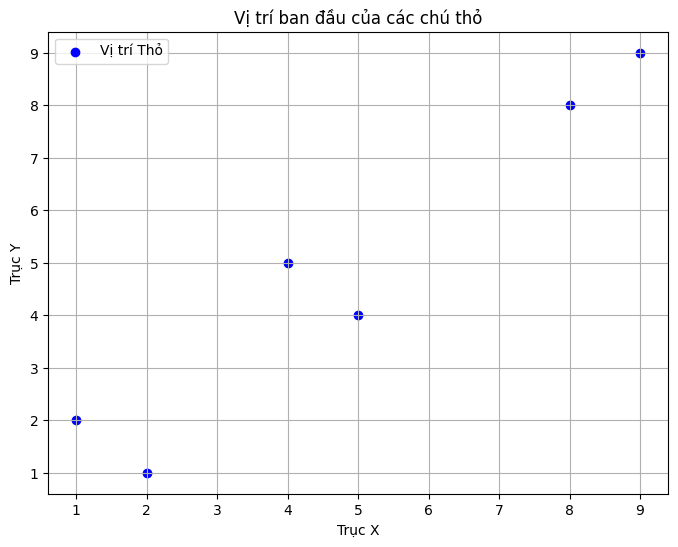

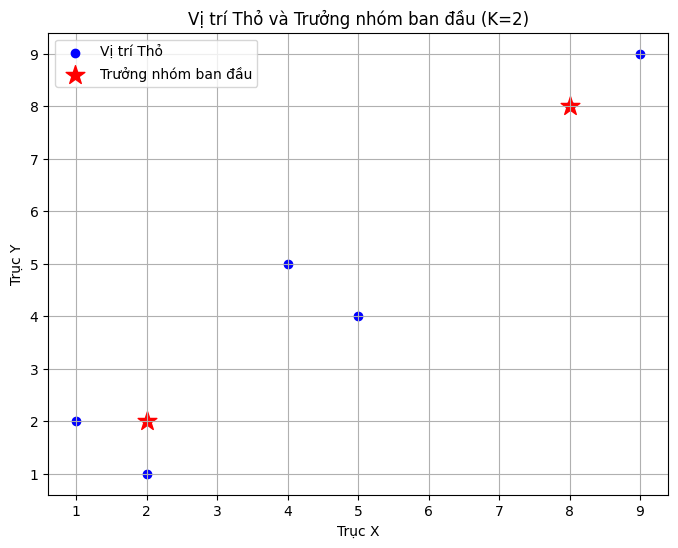

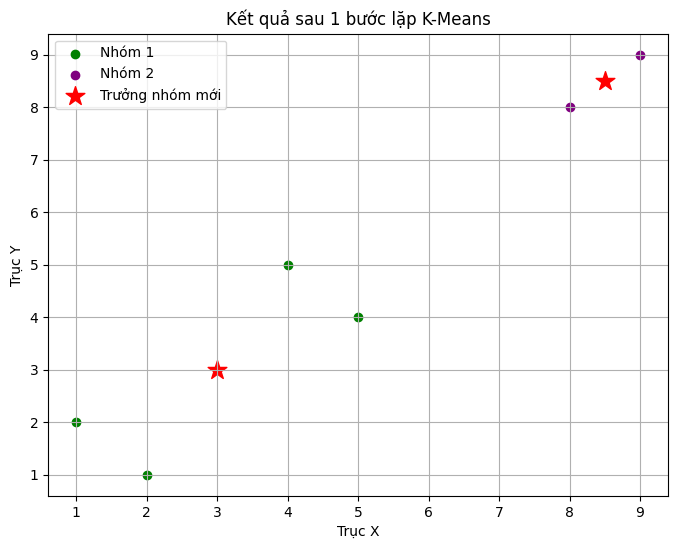

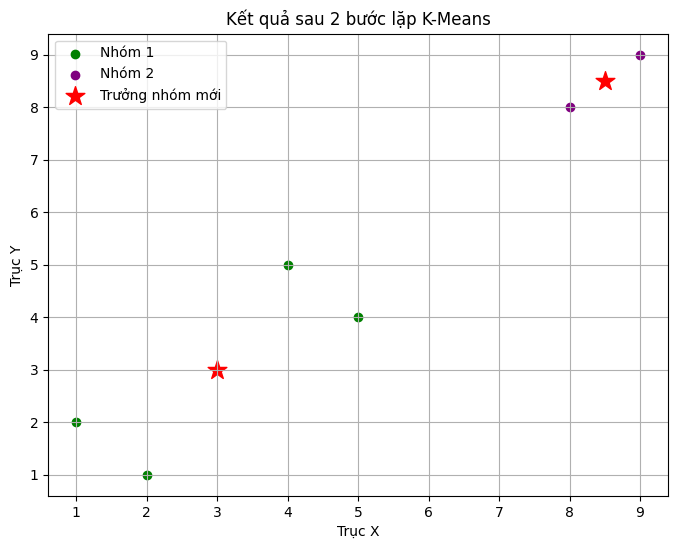

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu vị trí các chú thỏ (X)
X = np.array([[1, 2], [2, 1], [4, 5], [5, 4], [8, 8], [9, 9]])

# Số lượng nhóm (K)
K = 2

# Vị trí trưởng nhóm ban đầu (chọn ngẫu nhiên hoặc theo ví dụ trong truyện)
# Ở đây mình sẽ chọn theo ví dụ trong truyện để dễ theo dõi
m = np.array([[2, 2], [8, 8]])

# Hàm tính khoảng cách Euclidean bình phương (để đơn giản, không cần căn bậc hai)
def squared_distance(p1, p2):
    return np.sum((p1 - p2)**2)

# --- Bước 1: Hiển thị vị trí ban đầu của các chú thỏ ---
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', label='Vị trí Thỏ')
plt.title('Vị trí ban đầu của các chú thỏ')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.legend()
plt.show()

# --- Bước 2: Hiển thị vị trí trưởng nhóm ban đầu ---
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', label='Vị trí Thỏ')
plt.scatter(m[:, 0], m[:, 1], marker='*', s=200, color='red', label='Trưởng nhóm ban đầu')
plt.title('Vị trí Thỏ và Trưởng nhóm ban đầu (K=2)')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.legend()
plt.show()

# --- Minh họa 1 bước lặp của K-Means ---
# Bước gán nhãn (assignment step)
labels = np.argmin([[squared_distance(x, centroid) for centroid in m] for x in X], axis=1)

# Bước cập nhật trưởng nhóm (update step)
new_m = np.array([X[labels == k].mean(axis=0) if np.sum(labels == k) > 0 else m[k] for k in range(K)])

# --- Bước 3 & 4: Hiển thị kết quả sau 1 bước gán nhãn và cập nhật trưởng nhóm ---
plt.figure(figsize=(8, 6))
colors = ['green', 'purple']
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker='o', color=colors[i], label=f'Nhóm {i+1}')
plt.scatter(new_m[:, 0], new_m[:, 1], marker='*', s=200, color='red', label='Trưởng nhóm mới')
plt.title('Kết quả sau 1 bước lặp K-Means')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.legend()
plt.show()

# --- Minh họa thêm 1 bước lặp nữa ---
m = new_m # Cập nhật vị trí trưởng nhóm
labels = np.argmin([[squared_distance(x, centroid) for centroid in m] for x in X], axis=1)
new_m = np.array([X[labels == k].mean(axis=0) if np.sum(labels == k) > 0 else m[k] for k in range(K)])

# --- Bước 5: Hiển thị kết quả sau 2 bước lặp K-Means ---
plt.figure(figsize=(8, 6))
colors = ['green', 'purple']
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker='o', color=colors[i], label=f'Nhóm {i+1}')
plt.scatter(new_m[:, 0], new_m[:, 1], marker='*', s=200, color='red', label='Trưởng nhóm mới')
plt.title('Kết quả sau 2 bước lặp K-Means')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.legend()
plt.show()

# (Có thể thêm các bước lặp nữa nếu cần để thấy sự ổn định của trưởng nhóm)

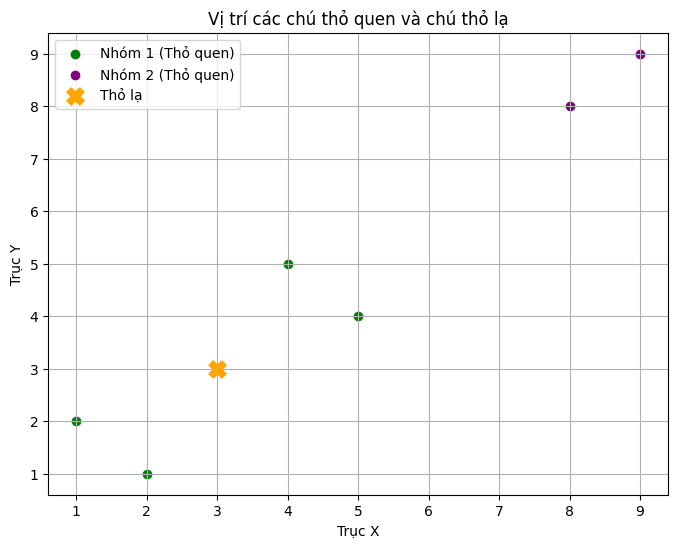

Chú thỏ lạ ở vị trí: [3 3]
Chỉ số của 3 chú thỏ quen gần nhất: [0 1 2]
Vị trí của 3 chú thỏ quen gần nhất: [[1 2]
 [2 1]
 [4 5]]
Nhóm của 3 chú thỏ quen gần nhất: [0 0 0]
Nhóm được dự đoán cho chú thỏ lạ (dựa trên đa số): Nhóm 1


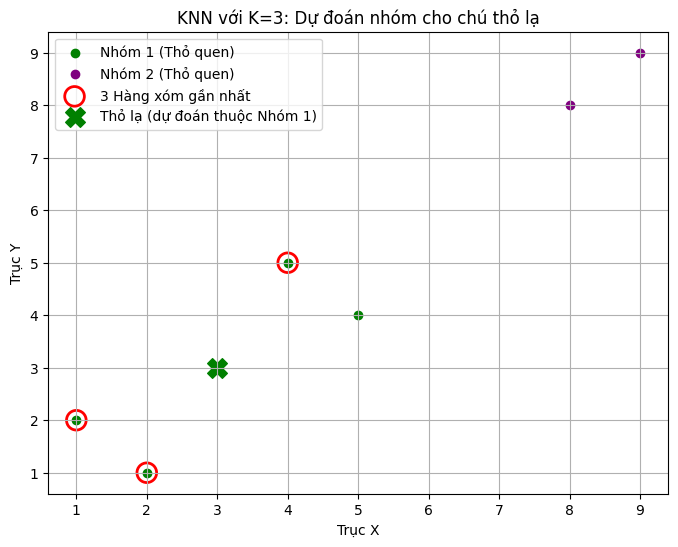

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Dữ liệu vị trí các chú thỏ quen đã được chia nhóm (giả định từ kết quả K-Means ổn định)
# Mình sẽ dùng lại dữ liệu X ban đầu, và giả định kết quả chia nhóm sau K-Means
X_train = np.array([[1, 2], [2, 1], [4, 5], [5, 4], [8, 8], [9, 9]])
# Giả định nhãn nhóm sau K-Means ổn định (Nhóm 1 và Nhóm 2)
y_train = np.array([0, 0, 0, 0, 1, 1]) # 0 cho Nhóm 1 (xanh lá), 1 cho Nhóm 2 (tím)

# Vị trí của chú thỏ lạ
x_new = np.array([[3, 3]])

# Số lượng hàng xóm gần nhất cần xem xét (K trong KNN)
K_knn = 3

# --- Bước 1: Hiển thị các chú thỏ quen đã được chia nhóm ---
plt.figure(figsize=(8, 6))
colors = ['green', 'purple']
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], marker='o', color=colors[i], label=f'Nhóm {i+1} (Thỏ quen)')

# --- Bước 2: Thêm chú thỏ lạ vào biểu đồ ---
plt.scatter(x_new[:, 0], x_new[:, 1], marker='X', s=150, color='orange', label='Thỏ lạ')

plt.title('Vị trí các chú thỏ quen và chú thỏ lạ')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.legend()
plt.show()

# --- Bước 3 & 4: Tính khoảng cách và tìm K hàng xóm gần nhất ---
# Sử dụng thư viện sklearn để tìm hàng xóm gần nhất
neigh = NearestNeighbors(n_neighbors=K_knn)
neigh.fit(X_train)

# Tìm chỉ số và khoảng cách đến K hàng xóm gần nhất
distances, indices = neigh.kneighbors(x_new)

# Chỉ số của K hàng xóm gần nhất
nearest_neighbor_indices = indices[0]

# Vị trí của K hàng xóm gần nhất
nearest_neighbors = X_train[nearest_neighbor_indices]

# Nhãn của K hàng xóm gần nhất
nearest_neighbors_labels = y_train[nearest_neighbor_indices]

print(f"Chú thỏ lạ ở vị trí: {x_new[0]}")
print(f"Chỉ số của {K_knn} chú thỏ quen gần nhất: {nearest_neighbor_indices}")
print(f"Vị trí của {K_knn} chú thỏ quen gần nhất: {nearest_neighbors}")
print(f"Nhóm của {K_knn} chú thỏ quen gần nhất: {nearest_neighbors_labels}")

# --- Bước 5: Dự đoán nhóm cho chú thỏ lạ (dựa trên đa số phiếu) ---
from collections import Counter
# Đếm số lần xuất hiện của mỗi nhãn trong các hàng xóm gần nhất
label_counts = Counter(nearest_neighbors_labels)
# Nhãn nhóm được dự đoán (nhãn xuất hiện nhiều nhất)
predicted_label = label_counts.most_common(1)[0][0]

print(f"Nhóm được dự đoán cho chú thỏ lạ (dựa trên đa số): Nhóm {predicted_label + 1}")

# --- Hiển thị lại biểu đồ, highlight K hàng xóm và chú thỏ lạ với nhóm dự đoán ---
plt.figure(figsize=(8, 6))
# Vẽ lại các chú thỏ quen
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], marker='o', color=colors[i], label=f'Nhóm {i+1} (Thỏ quen)')

# Highlight K hàng xóm gần nhất (có thể dùng viền hoặc màu khác)
plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], marker='o', s=200, facecolors='none', edgecolors='red', linewidth=2, label=f'{K_knn} Hàng xóm gần nhất')

# Vẽ chú thỏ lạ với màu của nhóm dự đoán
plt.scatter(x_new[:, 0], x_new[:, 1], marker='X', s=200, color=colors[predicted_label], label=f'Thỏ lạ (dự đoán thuộc Nhóm {predicted_label + 1})')

plt.title(f'KNN với K={K_knn}: Dự đoán nhóm cho chú thỏ lạ')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.grid(True)
plt.legend()
plt.show()